In [20]:
import numpy as np
import sys
import os
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load
# needed for some matrix manipulations
import matplotlib.pyplot as plt
# for plots
import seaborn
# # to get date for saving data
from datetime import date    


# set up seaborn for the plots
seaborn.set()


In [21]:
# change directory to specified path
path = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/2020-07-21_brainsweep'
os.chdir(path)
os.getcwd()

'/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/2020-07-21_brainsweep'

In [22]:
re_start_path = '_Trial_reacherror_start_data.npy'
targ_path = '_Trial_target_data.npy'
cursor_st_path = '_Trial_cursor_start_data.npy'

# any paramters file is fine
param_file = '2020-07-21_BRAIN_ADAPT_True_BRAIN_RATE_1e-10_DEC_ADAPT_True_K_RATE_0.0001_A_RATE_0.0001_Parameters.npz'

parameters=np.load(param_file)
NUM_TRIALS = parameters['num_trials']
NUM_SESSIONS = parameters['num_sessions']
NUM_B_RATES = parameters['num_b_rate']
B_RATE_LIST = parameters['b_rate_list']
NUM_D_RATES = parameters['num_d_rate']
D_RATE_LIST = parameters['d_rate_list']

#np.savez(filename + '_Parameters.npz', num_trials=NUM_TRIALS, num_sessions=NUM_SESSIONS, 
#          decoder_adapt=DECODER_ADAPT, brain_adapt=BRAIN_ADAPT, brain_rate=lambda_rate, 
#          k_rate=K_RATE, a_rate=A_RATE, num_b_rate=NUM_B_RATE, num_d_rate=NUM_D_RATE, b_rate_list=rate_list, d_rate_list=dec_rate_list)

print("Number of Trials = " + str(NUM_TRIALS))
print("Number of Sessions = " + str(NUM_SESSIONS))
print("")
print("Number of Brain Rates = " + str(NUM_B_RATES))
print("Brain Rates = " + str(B_RATE_LIST))
print("")
print("Number of Decoder Rates = " + str(NUM_D_RATES))
print("Decoder Rates = " + str(D_RATE_LIST))

Number of Trials = 250
Number of Sessions = 5

Number of Brain Rates = 10
Brain Rates = [1.00000000e+00 7.74263683e-02 5.99484250e-03 4.64158883e-04
 3.59381366e-05 2.78255940e-06 2.15443469e-07 1.66810054e-08
 1.29154967e-09 1.00000000e-10]

Number of Decoder Rates = 1
Decoder Rates = [0.0001]


In [23]:
path_B = np.empty(NUM_B_RATES, dtype='<U256')
path_D = np.empty(NUM_D_RATES, dtype='<U256')
# rate_B = np.empty(NUM_B_RATES)
# rate_D = np.empty(NUM_D_RATES)

path = np.empty([NUM_B_RATES, NUM_D_RATES], dtype='<U256')
# rates = np.empty([NUM_B_RATES, NUM_D_RATES, 2])

re_start = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_TRIALS, NUM_SESSIONS])
mean_re = np.empty([NUM_B_RATES, NUM_D_RATES])
mean_re_last = np.empty([NUM_B_RATES, NUM_D_RATES])
targ = np.empty([NUM_B_RATES, NUM_D_RATES, 2, 1, NUM_TRIALS, NUM_SESSIONS])
cursor_st = np.empty([NUM_B_RATES, NUM_D_RATES, 2, 1, NUM_TRIALS, NUM_SESSIONS])

In [24]:
# Need to list out the paths, there's probably a more clever way
# rate list: [3.16227766e-04 1.00000000e-04 3.16227766e-05 1.00000000e-05 3.16227766e-06 1.00000000e-06]

date = '2020-07-21'

path_B[0] = '_BRAIN_ADAPT_True_BRAIN_RATE_1.0'
path_B[1] = '_BRAIN_ADAPT_True_BRAIN_RATE_0.0774263682681127'
path_B[2] = '_BRAIN_ADAPT_True_BRAIN_RATE_0.005994842503189409'
path_B[3] = '_BRAIN_ADAPT_True_BRAIN_RATE_0.00046415888336127773'
path_B[4] = '_BRAIN_ADAPT_True_BRAIN_RATE_3.5938136638046256e-05'
path_B[5] = '_BRAIN_ADAPT_True_BRAIN_RATE_2.782559402207126e-06'
path_B[6] = '_BRAIN_ADAPT_True_BRAIN_RATE_2.1544346900318822e-07'
path_B[7] = '_BRAIN_ADAPT_True_BRAIN_RATE_1.6681005372000556e-08'
path_B[8] = '_BRAIN_ADAPT_True_BRAIN_RATE_1.2915496650148826e-09'
path_B[9] = '_BRAIN_ADAPT_True_BRAIN_RATE_1e-10'

path_D[0] = '_DEC_ADAPT_True_K_RATE_0.0001_A_RATE_0.0001'
# path_D[1] = '_DEC_ADAPT_True_K_RATE_0.0774263682681127_A_RATE_0.0774263682681127'
# path_D[2] = '_DEC_ADAPT_True_K_RATE_0.005994842503189409_A_RATE_0.005994842503189409'
# path_D[3] = '_DEC_ADAPT_True_K_RATE_0.00046415888336127773_A_RATE_0.00046415888336127773'
# path_D[4] = '_DEC_ADAPT_True_K_RATE_3.5938136638046256e-05_A_RATE_3.5938136638046256e-05'
# path_D[5] = '_DEC_ADAPT_True_K_RATE_2.782559402207126e-06_A_RATE_2.782559402207126e-06'
# path_D[6] = '_DEC_ADAPT_True_K_RATE_2.1544346900318822e-07_A_RATE_2.1544346900318822e-07'
# path_D[7] = '_DEC_ADAPT_True_K_RATE_1.6681005372000556e-08_A_RATE_1.6681005372000556e-08'
# path_D[8] = '_DEC_ADAPT_True_K_RATE_1.2915496650148826e-09_A_RATE_1.2915496650148826e-09'
# path_D[9] = '_DEC_ADAPT_True_K_RATE_1e-10_A_RATE_1e-10'


# [0,:] = 1.00000000e-06
for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        path[iB, iD] = '' + date + path_B[iB] + path_D[iD]


In [25]:
lastNum = 5

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        re_start[iB, iD] = np.load(path[iB, iD] + re_start_path)
        mean_re[iB, iD] = np.mean(re_start[iB, iD])
        mean_re_last[iB, iD] = np.mean(re_start[iB, iD, NUM_TRIALS-lastNum-1: NUM_TRIALS-1, :])
        targ[iB, iD, :, :, :, :] = np.load(path[iB, iD] + targ_path)
        cursor_st[iB, iD, :, :, :, :] = np.load(path[iB, iD] + cursor_st_path)

In [26]:
print(mean_re_last)

[[3.17975932e+126]
 [            nan]
 [1.32838910e+001]
 [3.14931929e+001]
 [1.04657273e+002]
 [9.31684249e+001]
 [7.92587482e+001]
 [5.03209068e+001]
 [6.32123478e+001]
 [8.90147231e+001]]


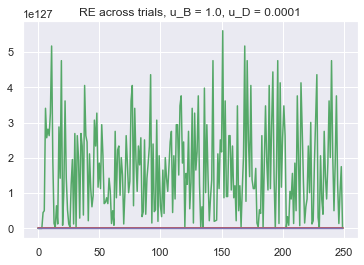

Mean: 3.3415492479611264e+126
Last 5 Trials: 3.179759316604734e+126



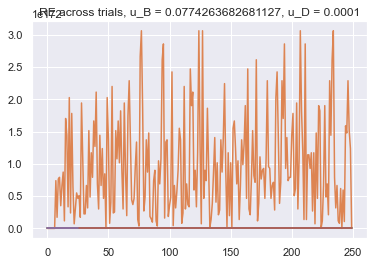

Mean: nan
Last 5 Trials: nan



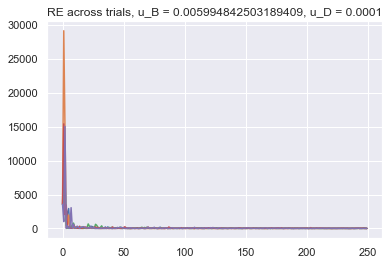

Mean: 140.21444544900925
Last 5 Trials: 13.283891015893385



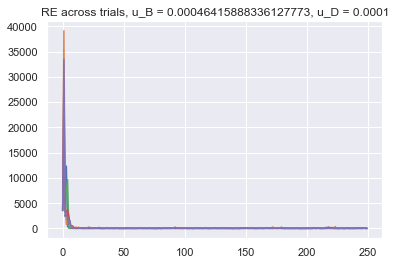

Mean: 208.53303905625214
Last 5 Trials: 31.49319291490022



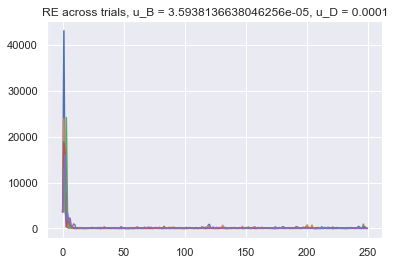

Mean: 249.70074288169533
Last 5 Trials: 104.65727311491237



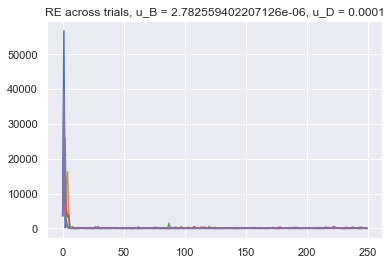

Mean: 263.9816112195789
Last 5 Trials: 93.16842493687632



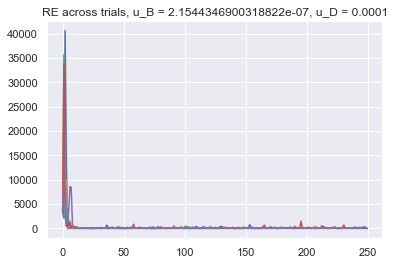

Mean: 264.03359357431617
Last 5 Trials: 79.25874822608702



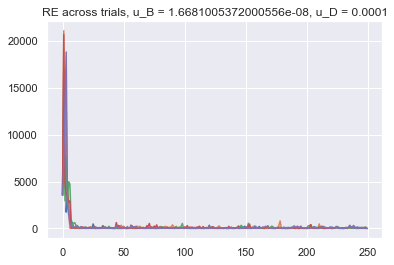

Mean: 238.50305499782502
Last 5 Trials: 50.32090677156388



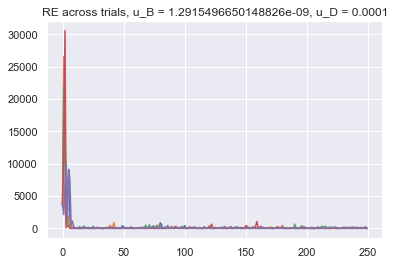

Mean: 246.59954824248516
Last 5 Trials: 63.21234778434271



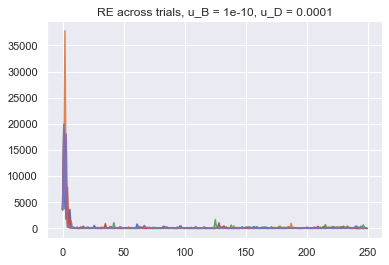

Mean: 268.260479372723
Last 5 Trials: 89.01472309346161



In [27]:
uB_idx = 0
uD_idx = 1

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        plt.plot(re_start[iB, iD])
        plt.title('RE across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.show()
        print("Mean: " + str(mean_re[iB, iD]))
        print("Last 5 Trials: " + str(mean_re_last[iB, iD]))
        print("")

# semilog, y
# log cost, squared error
        
# look at final "steady-state" reach error, average over the last 5-10 (1-10% of the last duration)
# keep magnitude constant -- error will be proportional with target magnitude
# normalize the target magnitudes so that they are along a unit circle
# firing rate plots -- make sure they are staying consistent with physical expectations

[[3.17975932e+126]
 [            nan]
 [1.32838910e+001]
 [3.14931929e+001]
 [1.04657273e+002]
 [9.31684249e+001]
 [7.92587482e+001]
 [5.03209068e+001]
 [6.32123478e+001]
 [8.90147231e+001]]


[Text(30.499999999999993, 0.5, 'uB'), Text(0.5, 12.5, 'uD')]

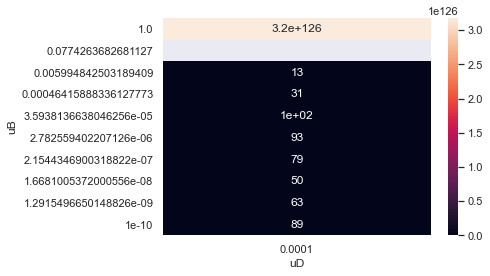

In [28]:
print(mean_re_last)

ax = seaborn.heatmap(mean_re_last, annot=True, fmt='.2g', xticklabels=D_RATE_LIST, yticklabels=B_RATE_LIST)
ax.set(xlabel="uD", ylabel = "uB")
# y = uB, x = uD


(8, 8)